# Recommender Sys (Content based)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_rating = pd.read_csv('../MachineLearning/data/rating.csv')
df_anime = pd.read_csv('../MachineLearning/data/anime.csv')

In [4]:
print(df_rating.shape, '\n\n', df_rating.info())
print(df_anime.shape, '\n\n', df_anime.info())
df_rating.dropna(inplace=True)
df_anime.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
(7813737, 3) 

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
(12294, 7) 

 None


In [5]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


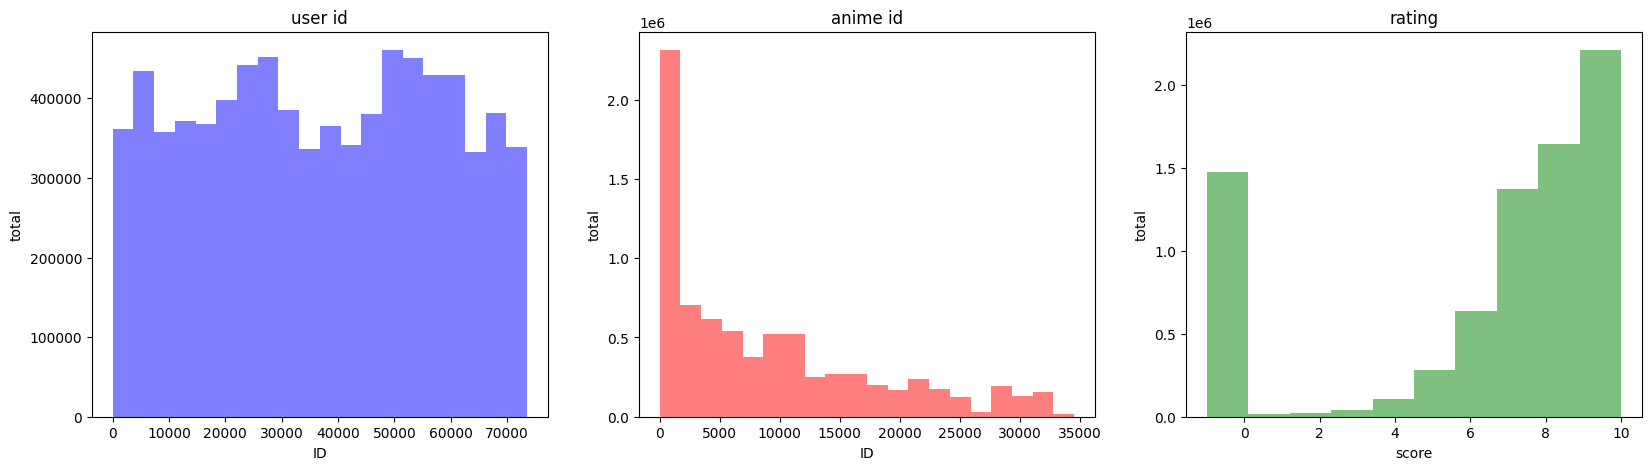

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(df_rating['user_id'], bins=20, color='blue', alpha=0.5)
axs[1].hist(df_rating['anime_id'], bins=20, color='red', alpha=0.5)
axs[2].hist(df_rating['rating'], bins=10, color='green', alpha=0.5)

axs[0].set_title('user id')
axs[1].set_title('anime id')
axs[2].set_title('rating')
axs[0].set_xlabel('ID')
axs[1].set_xlabel('ID')
axs[2].set_xlabel('score')
axs[0].set_ylabel('total')
axs[1].set_ylabel('total')
axs[2].set_ylabel('total')

plt.show()

Các giá trị không được vote sẽ không ảnh hưởng đến kết quả cuối cùng vì vậy chúng ta có thể bỏ nó đi (thực tế thì chúng ta sẽ vote cho nó)

In [8]:
df_rating = df_rating.drop(index=df_rating[df_rating["rating"] < 0].index)

In [9]:
df_rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


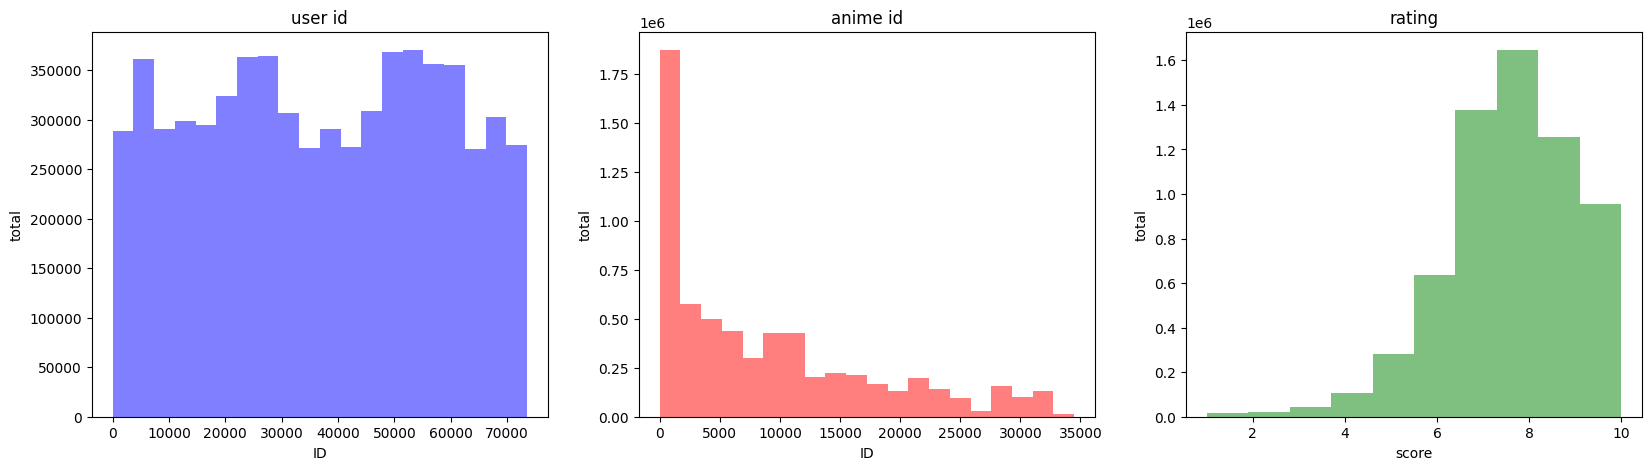

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(df_rating['user_id'], bins=20, color='blue', alpha=0.5)
axs[1].hist(df_rating['anime_id'], bins=20, color='red', alpha=0.5)
axs[2].hist(df_rating['rating'], bins=10, color='green', alpha=0.5)

axs[0].set_title('user id')
axs[1].set_title('anime id')
axs[2].set_title('rating')
axs[0].set_xlabel('ID')
axs[1].set_xlabel('ID')
axs[2].set_xlabel('score')
axs[0].set_ylabel('total')
axs[1].set_ylabel('total')
axs[2].set_ylabel('total')

plt.show()

Hàm khởi tạo ma trận thể loại 

In [11]:
def toBinaryMatrix(df, cols, inplace=False):
  sample = list()
  result = list()
  for i in df[cols]:
    sample.extend(i.split(', '))

  sample = list(set(sample))
  print(sample)
  for i in df[cols]:
    rsTemp = list()
    temp = i.split(', ')
    for j in sample:
      if j in temp:
        rsTemp.append(1)
      else:
        rsTemp.append(0)
    result.append(rsTemp)
  
  if inplace == True:
    df[cols] = result
      
  return result

In [12]:
toBinaryMatrix(df_anime, 'genre', inplace=True)
df_anime.head()

['Adventure', 'Super Power', 'Psychological', 'Slice of Life', 'Cars', 'Fantasy', 'Music', 'Thriller', 'Shounen', 'Vampire', 'Drama', 'Hentai', 'Harem', 'Yaoi', 'Demons', 'Comedy', 'Mystery', 'Parody', 'Magic', 'Romance', 'Space', 'Josei', 'Shoujo', 'Action', 'Ecchi', 'Samurai', 'Sci-Fi', 'Historical', 'Shounen Ai', 'Kids', 'Yuri', 'Supernatural', 'Mecha', 'Horror', 'Dementia', 'Sports', 'Game', 'School', 'Military', 'Police', 'Shoujo Ai', 'Martial Arts', 'Seinen']


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",TV,64,9.26,793665
2,28977,Gintama°,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",TV,24,9.17,673572
4,9969,Gintama&#039;,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",TV,51,9.16,151266


In [13]:
df = pd.merge(df_rating,df_anime.drop('rating',axis=1),on='anime_id')
df.dropna(inplace=True)

In [14]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,8074,10,Highschool of the Dead,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV,12,535892
1,3,8074,6,Highschool of the Dead,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV,12,535892
2,5,8074,2,Highschool of the Dead,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV,12,535892
3,12,8074,6,Highschool of the Dead,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV,12,535892
4,14,8074,6,Highschool of the Dead,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV,12,535892


In [15]:
X_train_counts = df_anime['genre'].values
print(X_train_counts[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


Tính TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf = transformer.fit_transform(X_train_counts.tolist()).toarray()

In [18]:
print(tfidf[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43900839 0.
 0.         0.         0.         0.         0.         0.
 0.         0.48892081 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.54547431 0.         0.         0.         0.
 0.         0.52027478 0.         0.         0.         0.
 0.        ]


In [20]:
import numpy as np
def get_items_rated_by_user(rate_matrix, info_matrix, user_id):
    """
    in each line of rate_matrix, we have infor: user_id, anime_id, rating (scores)
    we care about the first three values
    return (item_ids, scores) rated by user user_id
    """
    y = rate_matrix[:,0] # all users
    # item indices rated by user_id
    # we need to +1 to user_id since in the rate_matrix, id starts from 1 
    # while index in python starts from 0
    ids = np.where(y == user_id)[0] 
    item_ids = rate_matrix[ids, 1] 
    scores = rate_matrix[ids, 2]
    # print(item_ids, user_id)
    item_ids_in_anime = list()
    for i in item_ids:
      # print(np.where(info_matrix[:, 0] == i)[0], i)
      item_ids_in_anime.append(np.where(info_matrix[:, 0] == i)[0][0])

    return (np.array(item_ids_in_anime), scores)

In [27]:
# tao tap train thu
df_new = df[df['user_id'] <= 40000]
df_new = df_new.sort_values(by='user_id')
rate_train = df_new.iloc[::2].values
rate_test = df_new.iloc[1::2].values
print(rate_train[0])
anime_info = df_anime.values
print(anime_info[0])
user_ids = df_new['user_id'].unique()
print(user_ids)

[1 8074 10 'Highschool of the Dead'
 list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
 'TV' '12' 535892]
[32281 'Kimi no Na wa.'
 list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
 'Movie' '1' 9.37 200630]
[    1     2     3 ... 39998 39999 40000]


In [33]:
# tao tap train that
df = df.sort_values(by='user_id')
rate_train = df.iloc[::3].values
rate_test = df.values
indices_to_delete = np.arange(0, len(rate_test), 3)
rate_test = np.delete(rate_test, indices_to_delete)
print(rate_train[0])
anime_info = df_anime.values
print(anime_info[0])
user_ids = df['user_id'].unique()
print(user_ids)

[1 8074 10 'Highschool of the Dead'
 list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
 'TV' '12' 535892]
[32281 'Kimi no Na wa.'
 list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
 'Movie' '1' 9.37 200630]
[    1     2     3 ... 73514 73515 73516]


In [93]:
filtered_df = df_anime.loc[df_anime['anime_id'] == 32281]
print(filtered_df)

filtered_df = df.loc[df['anime_id'] == 33242]
print(filtered_df)

   anime_id            name  \
0     32281  Kimi no Na wa.   

                                               genre   type episodes  rating  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  Movie        1    9.37   

   members  
0   200630  
Empty DataFrame
Columns: [user_id, anime_id, rating, name, genre, type, episodes, members]
Index: []


In [34]:
from sklearn.linear_model import Ridge
from sklearn import linear_model

d = tfidf.shape[1] # data dimension
W = np.zeros((d, np.max(user_ids) + 1))
b = np.zeros((1, np.max(user_ids) + 1))

for n in user_ids:    
    # print(n)
    ids, scores = get_items_rated_by_user(rate_train, anime_info, n)
    clf = Ridge(alpha=0.01, fit_intercept  = True)
    if len(ids) == 0:
      ids = np.ones(1, dtype='int32')
      scores = np.ones(1, dtype='int32')
    # if n == 1:
      # print(ids, '\n', scores)
    Xhat = tfidf[ids, :]
    
    clf.fit(Xhat, scores) 
    W[:, n] = clf.coef_
    b[0, n] = clf.intercept_


In [35]:
Yhat = tfidf.dot(W) + b

MemoryError: Unable to allocate 6.58 GiB for an array with shape (12017, 73517) and data type float64

In [30]:
n = 12
np.set_printoptions(precision=2) # 2 digits after . 
ids, scores = get_items_rated_by_user(rate_train, anime_info, n)
ids = np.delete(ids, np.where(ids > 1000))

Yhat[n, ids]
print('Rated movies ids :', ids )
print('True ratings     :', scores)
print('Predicted ratings:', Yhat[ids, n])

Rated movies ids : [588 420 701 164 346  86 206   1 804]
True ratings     : [9 9 9 7 9 9 8 10 9 9 9]
Predicted ratings: [8.95 9.01 8.99 8.99 8.1  9.98 8.95 9.01 9.  ]


In [31]:
import math
def evaluate(Yhat, rates, W, b):
    se = 0
    cnt = 0
    for n in user_ids:
        ids, scores_truth = get_items_rated_by_user(rates, anime_info, n)
        if len(ids) == 0:
          ids = np.ones(1, dtype='int32')
          scores = np.ones(1, dtype='int32')
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e*e).sum(axis = 0)
        cnt += e.size 
    return math.sqrt(se/cnt)

print('RMSE for training:', evaluate(Yhat, rate_train, W, b))
print('RMSE for test    :', evaluate(Yhat, rate_test, W, b))

RMSE for training: 0.9176153033742785
RMSE for test    : 1.6456025034301622


trên thang đo điểm 10 với việc sai sót 1.65 điểm là điều có thể chấp nhận được trên tập test